<a href="https://colab.research.google.com/github/swilsonmfc/unsupervised/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agglomerative Clustering - Correlations

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_boston
from scipy.cluster.hierarchy import dendrogram

# Data

In [2]:
boston = load_boston()
df = pd.DataFrame(boston['data'], columns = boston['feature_names'])

## Correlations

In [14]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [3]:
corr = df.corr()
distance = 1 - abs(corr)
distance

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,0.000000,0.799531,0.593417,0.944108,0.579028,0.780753,0.647266,0.620330,0.374495,0.417236,0.710054,0.614936,0.544379
ZN,0.799531,0.000000,0.466172,0.957303,0.483396,0.688009,0.430463,0.335592,0.688052,0.685437,0.608321,0.824480,0.587005
INDUS,0.593417,0.466172,0.000000,0.937062,0.236349,0.608324,0.355221,0.291973,0.404871,0.279240,0.616752,0.643023,0.396200
CHAS,0.944108,0.957303,0.937062,0.000000,0.908797,0.908749,0.913482,0.900824,0.992632,0.964413,0.878485,0.951212,0.946071
NOX,0.579028,0.483396,0.236349,0.908797,0.000000,0.697812,0.268530,0.230770,0.388559,0.331977,0.811067,0.619949,0.409121
RM,0.780753,0.688009,0.608324,0.908749,0.697812,0.000000,0.759735,0.794754,0.790153,0.707952,0.644499,0.871931,0.386192
AGE,0.647266,0.430463,0.355221,0.913482,0.268530,0.759735,0.000000,0.252119,0.543978,0.493544,0.738485,0.726466,0.397661
DIS,0.620330,0.335592,0.291973,0.900824,0.230770,0.794754,0.252119,0.000000,0.505412,0.465568,0.767529,0.708488,0.503004
RAD,0.374495,0.688052,0.404871,0.992632,0.388559,0.790153,0.543978,0.505412,0.000000,0.089772,0.535259,0.555587,0.511324
TAX,0.417236,0.685437,0.279240,0.964413,0.331977,0.707952,0.493544,0.465568,0.089772,0.000000,0.539147,0.558192,0.456007


# Linkage
Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

* ‘ward’ minimizes the variance of the clusters being merged.
* ‘average’ uses the average of the distances of each observation of the two sets.
* ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
* ‘single’ uses the minimum of the distances between all observations of the two sets.

For precomputed distance (Correlations)
* Use linkage = complete & affinity = precomputed
* Distance = 1 - abs(corr) -- Strength of correlation


For precomputed distance (Co-occurrence)

* Use linkage = complete & affinity = precomputed
* Distance = 1 - data / data.max()

# Cluster on Distance
* Fit to a minimum distance
  * Distance_threshold -- Cut point on graph
  * N_clusters -- Set to None

In [4]:
cluster = AgglomerativeClustering(distance_threshold=0.5, n_clusters=None, linkage='complete', affinity='precomputed')
cluster.fit(distance.values)
label_groups = cluster.labels_

## Plot

In [5]:
def plot_dendrogram(model, labels, **kwargs):
  """
  Modified example from sklearn.dendrogram plot
  """
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
          if child_idx < n_samples:
              current_count += 1  # leaf node
          else:
              current_count += counts[child_idx - n_samples]
      counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, 
                                    model.distances_,
                                    counts]).astype(float)

  dendrogram(linkage_matrix, labels=labels, leaf_rotation=90, **kwargs)

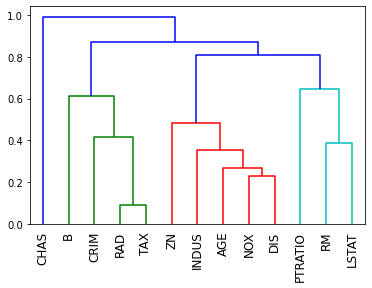

In [6]:
plot_dendrogram(cluster, list(df.columns), truncate_mode='level')

In [7]:
pd.DataFrame(zip(df.columns, label_groups), columns=['Feature', 'Assignment'])

,Feature,Assignment
0,CRIM,1
1,ZN,0
2,INDUS,0
3,CHAS,3
4,NOX,0
5,RM,2
6,AGE,0
7,DIS,0
8,RAD,1
9,TAX,1


# Assignments
* Assign to a fixed number of clusters
  * Distance_threshold -- None
  * N_clusters -- Set to desired # of Clusters
  

In [12]:
cluster = AgglomerativeClustering(distance_threshold=None, n_clusters=3, linkage='complete', affinity='precomputed')
cluster.fit(distance.values)
label_groups = cluster.labels_

In [13]:
pd.DataFrame(zip(df.columns, label_groups), columns=['Feature', 'Assignment'])

,Feature,Assignment
0,CRIM,2
1,ZN,0
2,INDUS,0
3,CHAS,1
4,NOX,0
5,RM,0
6,AGE,0
7,DIS,0
8,RAD,2
9,TAX,2


# Co-Occurrence

select ... where colA, colB, colC
* colA - colB
* colB - colC
* colA - colC


In [24]:
example = corr * 100
example = example.abs()
1 - example / example.max() # <- Distance of a co-occurrence

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,0.000000,0.799531,0.593417,0.944108,0.579028,0.780753,0.647266,0.620330,0.374495,0.417236,0.710054,0.614936,0.544379
ZN,0.799531,0.000000,0.466172,0.957303,0.483396,0.688009,0.430463,0.335592,0.688052,0.685437,0.608321,0.824480,0.587005
INDUS,0.593417,0.466172,0.000000,0.937062,0.236349,0.608324,0.355221,0.291973,0.404871,0.279240,0.616752,0.643023,0.396200
CHAS,0.944108,0.957303,0.937062,0.000000,0.908797,0.908749,0.913482,0.900824,0.992632,0.964413,0.878485,0.951212,0.946071
NOX,0.579028,0.483396,0.236349,0.908797,0.000000,0.697812,0.268530,0.230770,0.388559,0.331977,0.811067,0.619949,0.409121
RM,0.780753,0.688009,0.608324,0.908749,0.697812,0.000000,0.759735,0.794754,0.790153,0.707952,0.644499,0.871931,0.386192
AGE,0.647266,0.430463,0.355221,0.913482,0.268530,0.759735,0.000000,0.252119,0.543978,0.493544,0.738485,0.726466,0.397661
DIS,0.620330,0.335592,0.291973,0.900824,0.230770,0.794754,0.252119,0.000000,0.505412,0.465568,0.767529,0.708488,0.503004
RAD,0.374495,0.688052,0.404871,0.992632,0.388559,0.790153,0.543978,0.505412,0.000000,0.089772,0.535259,0.555587,0.511324
TAX,0.417236,0.685437,0.279240,0.964413,0.331977,0.707952,0.493544,0.465568,0.089772,0.000000,0.539147,0.558192,0.456007
